# GROUP ASSIGNMENT THE CODE COMMANDOS

## In code we trust, with commandos we conquer

<pre>
- Siebren Barten   (1756508)
- Puck de Bruin    (1665650)
- Jette Bruurs     (1746774)
- Jilke Nooijen    (1712616)
- Silke Peters     (1711210)
- Lyonne Vlaar     (1657313)
- Marijn ter Weeme (1703625)

First, install packages

In [101]:
import pandas as pd 
from rdkit.Chem import AllChem
from rdkit import Chem 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sn
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.model_selection import train_test_split
from scipy.spatial import cKDTree
import csv

Read cvs files

In [102]:
df1 = pd.read_csv('tested_molecules-1.csv')
df1

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [103]:
df2 = pd.read_csv('tested_molecules_v2.csv')
df2

,SMILES,ALDH1_inhibition
0,[NH3+]CCSSCC[NH3+],0
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0
2,[NH3+]CCCCCCCCCC[NH3+],0
3,[NH3+]CCSSCC[NH3+],0
4,ClCC[NH+](CCCl)CCCl,0
...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
997,O=C(CCl)NC1CCCc2ccccc21,1
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


The df_untested is de dataframe with the 10.000 molecules. This dataframe is used to determine which molecules are ALDH1 inhibitors and which are not. 

In [104]:
df_untested=pd.read_csv("untested_molecules.csv")
SMILES_untested=df_untested['SMILES']

In [105]:
df= df1.append(df2,ignore_index=True)
df

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
1995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
1996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
1997,O=C(CCl)NC1CCCc2ccccc21,1
1998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


Next step is determining which descriptors we are going to use. Therefore we determine first all molecule descriptors and then filter missing values, duplicated rows and unique descriptors. 

In [106]:
def RDkit_descriptors(smiles):    # Get all descriptors from RDkit
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(df['SMILES'])
Mol_descriptors_untested, desc_names_untested = RDkit_descriptors(df_untested['SMILES'])

In [107]:
df_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_descriptors_untested = pd.DataFrame(Mol_descriptors_untested, columns=desc_names_untested)
df_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.648724,14.648724,0.060465,-5.034549,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,13.180567,13.180567,0.259504,-3.442212,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.154031,10.154031,0.626646,-5.536518,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.964559,11.964559,0.338689,-3.767788,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,12.970682,0.107779,-5.727217,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,13.691100,0.017897,-3.332878,0.492481,251.330,237.218,251.089247,90,0,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,12.799172,0.210081,-3.948066,0.661884,267.350,250.214,267.092914,98,0,...,0,0,0,0,0,0,0,1,0,0
1997,12.223679,12.223679,0.646387,-3.783460,0.767040,223.703,209.591,223.076392,80,0,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,14.110619,0.366586,-4.404360,0.561228,423.542,398.342,423.172896,156,0,...,1,0,0,0,0,0,0,0,0,0


In [108]:
correlation_matrix = df_descriptors.corr().abs()  # Find correlation between descriptors
threshold = 0.9
highly_correlated_columns = []
for column in range(len(correlation_matrix.columns)):
    for row in range(column):
        if correlation_matrix.iloc[column, row] > threshold:
            highly_correlated_columns.append(correlation_matrix.columns[column])
            
# Drop descriptors if correlation is higher than the threshold           
df_filtered = df_descriptors.drop(columns=highly_correlated_columns)
df_untested_filtered=df_descriptors_untested.drop(columns=highly_correlated_columns)

In [109]:
unique_descriptors = df_filtered.nunique() # Drop descripters if not unique
col_to_drop = unique_descriptors[unique_descriptors== 1].index
df_filtered=df_filtered.drop(col_to_drop, axis=1)
df_untested_filtered=df_untested_filtered.drop(col_to_drop, axis=1)

In [110]:
df_merged = df.join(df_filtered)
df_merged_untested=df_untested_filtered.join(df_untested)

In [111]:
data_missing=df_merged.isnull() # Find if any values are missing
missing_values=np.where(data_missing)
if len(missing_values[0])==0:
    print("There are no missing values")
else:
    print("The amount of missing values is "+str(len(missing_values[0])))

There are no missing values


In [112]:
df_duplicate = df_merged[df_merged.duplicated()] 
if len(df_duplicate)==0: # Compute howmany rows are missing
    print("There are no duplicated rows")
else:
    print("The amount of duplicated rows is "+str(len(df_duplicate)))
df_without_duplicates=df_merged.drop_duplicates().reset_index()
df_untested_filtered=df_merged_untested.drop_duplicates().reset_index()

The amount of duplicated rows is 25


In [113]:
label=df_without_duplicates["ALDH1_inhibition"]
SMILES=df_without_duplicates["SMILES"]

First store the ALDH1_inhibition and SMILES and then scale the data with Standard scaling. 

In [114]:
df_without_label=df_without_duplicates.drop("ALDH1_inhibition",axis=1)
df_without_label=df_without_label.drop("SMILES",axis=1).set_index("index")
desc_names=list(df_without_label.columns.values)

df_untested_without_SMILES=df_untested_filtered.drop("SMILES",axis=1).set_index("index")

In [115]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_without_label)
df_scaler = pd.DataFrame(df_scaler, columns=desc_names)

df_scaler_untested = scaler.fit_transform(df_untested_without_SMILES)
df_scaler_untested = pd.DataFrame(df_scaler_untested, columns=desc_names)

Determine how many principal components are needed for the analysis. Therefore we want to capture at least 90% of the dataset variance. 

,0
1,0.136164
2,0.202494
3,0.242669
4,0.278861
5,0.312828
...,...
154,1.000000
155,1.000000
156,1.000000
157,1.000000


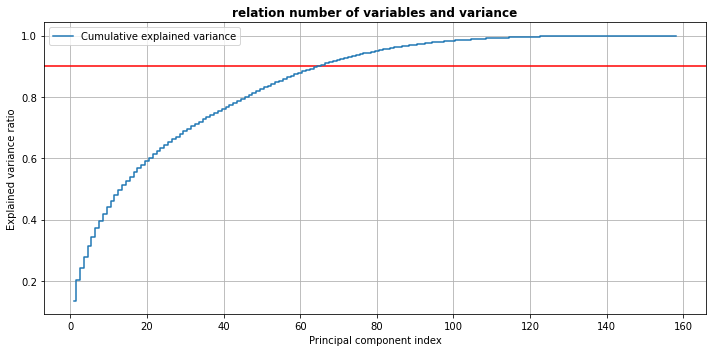

The number of variables needed for the PCA is: 66


In [116]:
pca = PCA()

# Determine transformed features
transformed_pca = pca.fit_transform(df_scaler)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
df_cum_sum = pd.DataFrame(cum_sum_eigenvalues)
df_cum_sum.index += 1
display(df_cum_sum)

# Create the visualization plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title('relation number of variables and variance', fontweight = 'bold')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#print point where variance is first above 0.9 
for i in range(1,len(df_cum_sum)): 
    if df_cum_sum[0][i] >= 0.9: 
        number_of_variables = df_cum_sum[0].index[i]
        print('The number of variables needed for the PCA is:', number_of_variables)
        break

# Source: Ajitesh Kumar, April 14, 2023
# https://vitalflux.com/pca-explained-variance-concept-python-example/

Create dataframe where the amount of columns is equal to the amount of PC's. 

In [117]:
pca = PCA(n_components = number_of_variables)
components = pca.fit_transform(df_scaler)
df_components = pd.DataFrame(components)

components_untested = pca.fit_transform(df_scaler_untested)
df_components_untested = pd.DataFrame(components_untested)

df_components_untested

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,3.457544,-0.656864,-1.344434,1.924477,-1.966401,-1.254360,-4.115157,4.119712,3.821991,-1.955911,...,1.241819,-0.005989,0.470466,-0.064947,-0.028011,-0.259141,0.691166,0.009876,0.453926,1.149693
1,5.811698,0.978045,0.580971,2.662132,-1.956514,-0.742781,-1.376398,-3.050046,-0.728858,0.025326,...,-0.200595,-0.320534,0.359805,0.077836,0.078717,0.496341,-0.937930,0.866918,-0.685013,-1.346996
2,1.072364,3.782801,-4.945204,2.775467,0.250685,1.387529,3.403819,-3.151358,-0.216660,0.702567,...,0.560267,-0.139738,0.445869,-1.165510,-0.208378,-0.161752,0.976687,-0.002087,1.252382,0.647886
3,1.242747,1.674715,-4.802662,0.557757,1.686291,2.542341,1.258590,0.933716,4.379317,-0.111788,...,-1.178175,0.123349,-0.224075,-0.689233,1.359800,0.890358,0.228039,-1.042352,-2.119813,0.263807
4,0.515073,-1.513612,-2.506433,1.087951,5.738412,-2.613448,0.147683,-1.766339,2.754135,2.893183,...,0.638392,0.528625,0.764168,-0.161566,-1.561214,-0.243098,0.399978,-0.187009,0.328999,-1.290255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,-1.535092,-3.768725,-1.439562,-0.767468,4.101532,1.085014,0.971583,1.471917,0.456060,-4.948132,...,0.009193,0.719853,0.030186,-1.332798,-0.096338,0.127838,0.391114,0.020371,-0.010237,0.191295
9965,10.176629,3.674282,-6.011728,-0.334727,4.820772,2.615278,-4.756057,4.594533,0.387060,-3.949758,...,0.586240,-0.559300,1.105065,0.342214,0.088073,0.475862,0.877187,0.953661,-0.166479,1.114015
9966,2.412009,4.060648,1.772964,-0.831108,0.643606,-2.313380,-1.415521,-3.895023,-0.577377,-0.751249,...,0.404109,0.409519,-0.705260,0.842535,-0.147655,-0.351104,-0.356749,0.064656,1.033976,0.897663
9967,3.026265,-5.911263,-1.235102,-7.380572,0.785806,0.108121,-0.646792,1.048259,2.154642,1.767952,...,0.530305,2.719584,-1.538402,0.778215,0.230127,1.242042,1.063565,0.205407,0.402251,-1.315781


In the variable merged_df_incl_label, merged_df is displayed and the variable named label is added. In this way there is a dataframe with the ALDH1_inhibition column and the other columns so it is possible to split on the ALDH1_inhibition characteristic. 

,PC1,PC2,PC3,ALDH1_inhibition
0,6.427580,-6.292198,0.280612,1
1,-1.188014,-4.544410,1.930605,1
2,5.865803,-5.288650,3.045971,1
3,-1.725377,2.899109,-1.167606,1
4,0.567952,-3.550441,-0.112710,1
...,...,...,...,...
1970,-0.423713,3.735144,-0.845422,1
1971,2.082881,3.622705,0.283992,1
1972,-0.529019,6.017851,0.642581,1
1973,3.431186,-3.500249,3.692552,1


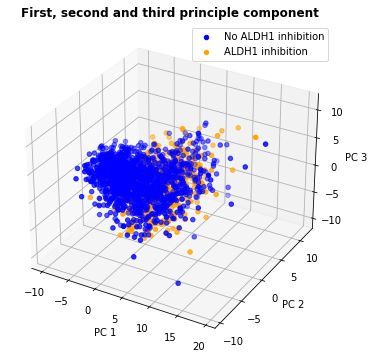

In [140]:
pca = PCA(n_components = number_of_variables)
transformed_plot = pca.fit_transform(df_scaler)
component_names = [f"PC{i+1}" for i in range(number_of_variables)]
df_scores=pd.DataFrame(data=transformed_plot, columns=component_names).iloc[:,:3]
inhibition=df["ALDH1_inhibition"]
df_scores["ALDH1_inhibition"]=inhibition

inh0_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC1"]
inh0_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC2"]
inh1_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC1"]
inh1_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC2"]
inh0_PC3=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC3"]
inh1_PC3=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC3"]

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection="3d")
plt.title('First, second and third principle component', fontweight = 'bold')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.scatter3D(inh0_PC1, inh0_PC2, inh0_PC3, c="blue",label="0");
ax.scatter3D(inh1_PC1, inh1_PC2, inh1_PC3, c="orange",label="1");
ax.legend(labels=['No ALDH1 inhibition','ALDH1 inhibition'])
df_scores

Split the data in test data and trainings data with a ratio of 80% trainings data and 20% test data. 

In [119]:
y = label
X = df_components
X_untested=df_components_untested
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_untested

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,3.457544,-0.656864,-1.344434,1.924477,-1.966401,-1.254360,-4.115157,4.119712,3.821991,-1.955911,...,1.241819,-0.005989,0.470466,-0.064947,-0.028011,-0.259141,0.691166,0.009876,0.453926,1.149693
1,5.811698,0.978045,0.580971,2.662132,-1.956514,-0.742781,-1.376398,-3.050046,-0.728858,0.025326,...,-0.200595,-0.320534,0.359805,0.077836,0.078717,0.496341,-0.937930,0.866918,-0.685013,-1.346996
2,1.072364,3.782801,-4.945204,2.775467,0.250685,1.387529,3.403819,-3.151358,-0.216660,0.702567,...,0.560267,-0.139738,0.445869,-1.165510,-0.208378,-0.161752,0.976687,-0.002087,1.252382,0.647886
3,1.242747,1.674715,-4.802662,0.557757,1.686291,2.542341,1.258590,0.933716,4.379317,-0.111788,...,-1.178175,0.123349,-0.224075,-0.689233,1.359800,0.890358,0.228039,-1.042352,-2.119813,0.263807
4,0.515073,-1.513612,-2.506433,1.087951,5.738412,-2.613448,0.147683,-1.766339,2.754135,2.893183,...,0.638392,0.528625,0.764168,-0.161566,-1.561214,-0.243098,0.399978,-0.187009,0.328999,-1.290255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,-1.535092,-3.768725,-1.439562,-0.767468,4.101532,1.085014,0.971583,1.471917,0.456060,-4.948132,...,0.009193,0.719853,0.030186,-1.332798,-0.096338,0.127838,0.391114,0.020371,-0.010237,0.191295
9965,10.176629,3.674282,-6.011728,-0.334727,4.820772,2.615278,-4.756057,4.594533,0.387060,-3.949758,...,0.586240,-0.559300,1.105065,0.342214,0.088073,0.475862,0.877187,0.953661,-0.166479,1.114015
9966,2.412009,4.060648,1.772964,-0.831108,0.643606,-2.313380,-1.415521,-3.895023,-0.577377,-0.751249,...,0.404109,0.409519,-0.705260,0.842535,-0.147655,-0.351104,-0.356749,0.064656,1.033976,0.897663
9967,3.026265,-5.911263,-1.235102,-7.380572,0.785806,0.108121,-0.646792,1.048259,2.154642,1.767952,...,0.530305,2.719584,-1.538402,0.778215,0.230127,1.242042,1.063565,0.205407,0.402251,-1.315781


Apply KNN and find the optimal amount of neighbors

0.697360248447205


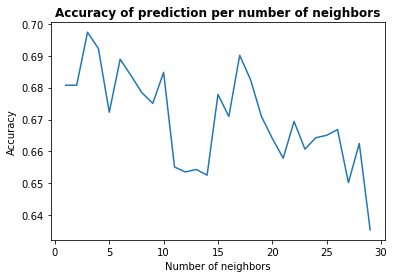

In [129]:
k_range = range(1,30)
scores = []
highest_value = 0
sub_highest_value = 0
optimal_k = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = metrics.balanced_accuracy_score(y_test, y_predict)
    scores.append(accuracy)
        
    if accuracy > sub_highest_value and accuracy <highest_value:
        sub_highest_value = accuracy
        sub_optimal_k = k
        
    if accuracy > highest_value:
        sub_highest_value =highest_value
        highest_value = accuracy
        sub_optimal_k = optimal_k
        optimal_k = k

plt.title('Accuracy of prediction per number of neighbors', fontweight = 'bold')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')

plt.plot(k_range, scores);
print(highest_value)

Calculate the accuracy

In [121]:
neighbours = KNeighborsClassifier(n_neighbors=optimal_k)
neighbours.fit(X_train, y_train)
y_pred = neighbours.predict(X_test)
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
balanced_acc

0.697360248447205

Predict what label the molecules have and save to dataframe

In [122]:
prediction_untested_molecules = neighbours.predict(X_untested)
df_pred_untested = pd.DataFrame(prediction_untested_molecules)
        
df_pred_untested = df_pred_untested.join(df_untested_filtered["SMILES"])
df_pred_untested 

,0,SMILES
0,0,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...
4,1,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1
...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC
9965,0,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1
9967,0,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl


In [123]:
df_pred_untested = df_pred_untested[[0, "SMILES"]]
df_components_untested["SMILES"] = df_pred_untested["SMILES"]
df_components_untested_smile = df_components_untested.set_index("SMILES")

df_inhibitors = pd.DataFrame()
for row in range(len(df_pred_untested)):
    if df_pred_untested[0][row] == 1:
        SMILE_inhibitor = df_pred_untested["SMILES"][row]
        df_inhibitors = df_inhibitors.append(df_components_untested_smile.loc[[SMILE_inhibitor]])
df_inhibitors

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
SMILES,,,,,,,,,,,,,,,,,,,,,
NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1,0.515073,-1.513612,-2.506433,1.087951,5.738412,-2.613448,0.147683,-1.766339,2.754135,2.893183,...,0.638392,0.528625,0.764168,-0.161566,-1.561214,-0.243098,0.399978,-0.187009,0.328999,-1.290255
CC1(C)CC(=O)C2=C(C1)OC([NH3+])=C(C#N)[C@@]21C(=O)N(CC(N)=O)c2ccccc21,5.046304,0.307297,-1.034629,2.659324,3.424251,4.102095,4.764288,4.044272,2.315038,2.278416,...,-0.404701,-1.338156,1.252873,1.351840,-0.582096,-1.436813,0.050390,-1.037694,0.088043,0.050557
O=C(c1ccc(S(=O)(=O)N2CCCCCC2)cc1)N1CCN(c2ccccn2)CC1,5.534145,-0.105578,3.129640,0.966719,-1.709174,-2.731597,-0.536709,-5.242841,0.176590,-0.671109,...,-0.444150,-0.127833,1.019615,-1.298514,-0.312542,-0.130865,0.561663,-0.165861,0.512984,-0.221528
CCOC(=O)C1CCN(C(=O)CN(c2ccc(OC)c(OC)c2)S(=O)(=O)c2ccccc2)CC1,8.613979,3.055084,-1.505699,-1.543088,-2.178221,1.931970,-3.037393,-2.969901,-2.751144,0.488783,...,-0.093592,-0.383404,-0.039609,0.049981,-0.128556,0.720976,-0.792937,0.352406,-0.902243,-0.247118
O=C(C1=C[C@H](c2ccc(C(F)(F)F)cc2)C[C@H](OCCCCO)O1)N1CC[NH+](Cc2ccccc2)CC1,9.710644,1.152472,-0.385950,-1.681773,-1.165991,-1.548685,0.140336,-0.819705,4.034099,4.302718,...,-0.511200,-1.126829,0.831425,-1.208601,0.391536,0.395999,1.390390,-0.438829,1.398518,-1.365979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O=C(CCCn1c(=S)[nH]c2cc3c(cc2c1=O)OCO3)N1CCN(c2ncccn2)CC1,4.339559,5.045154,4.088128,-1.620466,1.708642,-0.392169,1.912280,-1.550813,-2.443591,-0.278753,...,-0.331455,0.265776,0.039380,-0.055592,0.200045,-0.089958,0.931335,1.554464,0.314664,0.421401
O=C1c2ccccc2S(=O)(=O)N1CCOc1ccccc1,-1.701044,-0.456882,-1.884968,0.377490,-3.594001,-0.484069,0.211291,-2.819220,-1.124259,-0.853964,...,-0.280697,0.761201,0.439469,-0.825597,0.093126,0.114034,-0.620432,0.708502,0.720710,-0.880700
O=C(Cn1cnc2c(nnn2Cc2ccc(Cl)cc2)c1=O)OCc1ccccc1,-2.346681,6.336961,2.194800,0.693581,-0.324204,-0.007541,-1.230760,-0.276175,0.763585,-0.011942,...,0.314964,0.093071,0.061353,-0.341104,0.449711,0.704766,-1.236581,0.212213,0.957584,-0.061245


Find coördinates of tested and untested smiles

In [124]:
df_components["SMILES"] = SMILES
df_components = df_components.set_index("SMILES")
dict_components = df_components.to_dict("index")
dict_components_untested = df_inhibitors.to_dict("index")
all_coordinates = []
for key in dict_components:
    value = dict_components[key]
    coordinate = []
    for pc in value:
        point = value[pc]
        coordinate.append(point)
    all_coordinates.append(coordinate)
    dict_components[key] = coordinate

all_coordinates_untested = []
for key in dict_components_untested:
    value = dict_components_untested[key]
    coordinate_untested = []
    for pc in value:
        point_untested = value[pc]
        coordinate_untested.append(point_untested)
    all_coordinates_untested.append(coordinate_untested)
    dict_components_untested[key] = coordinate_untested



In [125]:
# Set up variables 
key_list_tested = list(dict_components.keys())
value_list_tested = list(dict_components.values())  
key_list_untested = list(dict_components_untested.keys())
value_list_untested = list(dict_components_untested.values())
    
kd_tree1=cKDTree(all_coordinates_untested)
kd_tree2=cKDTree(all_coordinates)
indexes = kd_tree1.query_ball_tree(kd_tree2, r=1.1)

Find number of nearby neighbours 

In [126]:
dict_number_neighbours = {}
df_known_inhibitors = df.set_index("SMILES")
for i in range(len(indexes)):
    key = key_list_untested[value_list_untested.index(all_coordinates_untested[i])]
    value = 0
    for j in indexes[i]:
        nearby_smile = key_list_tested[value_list_tested.index(all_coordinates[j])]
        inhibition = df_known_inhibitors.loc[nearby_smile, "ALDH1_inhibition"]
        if inhibition == 1:
            value += 1
    if value != 0:
        dict_number_neighbours[key] = value

Select 100 best molecules and write to a CSV file

In [127]:
sorted_smiles_by_inhibitors = sorted(dict_number_neighbours.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_smiles_by_inhibitors)
keys_converted_dict = list(converted_dict.keys())
keys_converted_dict = [list([n]) for n in keys_converted_dict]
keys_converted_dict.insert(0, ['SMILES'])

first_100 = keys_converted_dict[1:101]
with open('Best_smiles_group7.csv', 'w', newline='') as csv_outfile:
    f = csv.writer(csv_outfile)
    f.writerows(first_100)